In [1]:
from scipy.integrate import quad
import numpy as np

def get_B(x, y, z, x0, y0, z0, B0, R):
    # Ring lies in xy plane
    def integrand_x(t, x, y, z):
        r_mag = np.sqrt((x-R*np.cos(t))**2 + (y-R*np.sin(t))**2 + z**2)
        r_3 = r_mag**3
        return R*z*np.cos(t)/r_3

    def integrand_y(t, x, y, z):
        r_mag = np.sqrt((x-R*np.cos(t))**2 + (y-R*np.sin(t))**2 + z**2)
        r_3 = r_mag**3
        return R*z*np.sin(t)/r_3

    def integrand_z(t, x, y, z):
        r_mag = np.sqrt((x-R*np.cos(t))**2 + (y-R*np.sin(t))**2 + z**2)
        r_3 = r_mag**3
        return R*(R - y*np.sin(t) - x*np.cos(t))/r_3 # Corrected
    
    
    a = 0
    b = 2*np.pi
    
    bx = B0*quad(integrand_x, a, b, args=(x-x0, y-y0, z-z0))[0]
    by = B0*quad(integrand_y, a, b, args=(x-x0, y-y0, z-z0))[0]
    bz = B0*quad(integrand_z, a, b, args=(x-x0, y-y0, z-z0))[0]
    
    return (bx, by, bz)

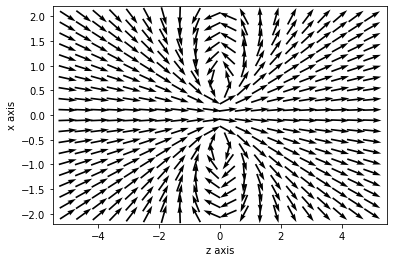

In [2]:
# Original dimensions

import matplotlib.pyplot as plt

x_max = 2
x_min = -2

z_max = 5
z_min = -5

N = 20

X = np.linspace(x_min, x_max, N)
Z = np.linspace(z_min, z_max, N)


V = []


for i in X:
    r = []
    for j in Z:
        # Br = get_B(i, 0, j, 0, 0, 4, 1, .5)
        Bl = get_B(i, 0, j, 0, 0, 0, 1, .5)
        
        # B = np.add(Br, Bl)
        
        plt.quiver(j, i, Bl[2], Bl[0], width=.005, pivot='mid')
        plt.xlabel('z axis')
        plt.ylabel('x axis')
        
        #r.append(B)
    
    #V.append(r)

### Smilei input dimensions

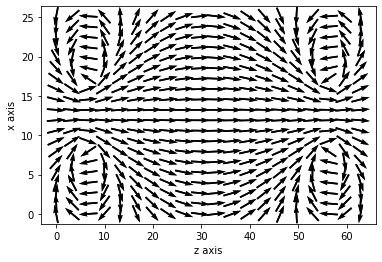

In [11]:
import matplotlib.pyplot as plt

l0 = 2*np.pi

Lx = 4*l0
x_min = 0

Ly = 4*l0
y_min = 0

Lz= 10*l0
z_min = 0

B0 = 1
R = 2.1*l0

#Ring 1
x0 = Lx/2
y0 = Ly/2
z0 = 1*l0

#Ring 2import matplotlib.pyplot as plt

l0 = 2*np.pi

Lx = 4*l0
x_min = 0

Ly = 4*l0
y_min = 0

Lz= 10*l0
z_min = 0

B0 = 1
R = 2.1*l0

#Ring 1
x0 = Lx/2
y0 = Ly/2
z0 = 1*l0

#Ring 2
x1 = Lx/2
y1 = Ly/2
z1 = 9*l0

# Resolution
resx         = 8.      #32               # nb of cells in one laser wavelength
resy         = 8.                     
resz         = 8.

# Domain
dx           = l0/resx
dy           = l0/resy
dz           = l0/resz

Nx = Lx/dx
Nz = Lz/dz

Nx=20
Nz=20

xx = np.linspace(x_min, Lx, int(Nx))
zz = np.linspace(z_min, Lz, int(Nz))


for i in xx:
    r = []
    for j in zz:
        Bl = get_B(i, 0, j, x0, y0, z0, B0 ,R)
        Br = get_B(i, 0, j, x1, y1, z1, B0 ,R)
        
        B = np.add(Br, Bl)
        
        plt.quiver(j, i, B[2], B[0], width=.005, pivot='mid')
        plt.xlabel("z axis")
        plt.ylabel("x axis")
        # plt.gca().set_aspect('equal')
        
        #r.append(B)
    
    #V.append(r)
x1 = Lx/2
y1 = Ly/2
z1 = 9*l0

# Resolution
resx         = 8.      #32               # nb of cells in one laser wavelength
resy         = 8.                     
resz         = 8.

# Domain
dx           = l0/resx
dy           = l0/resy
dz           = l0/resz

Nx = Lx/dx
Nz = Lz/dz

Nx=20
Nz=20

xx = np.linspace(x_min, Lx, int(Nx))
zz = np.linspace(z_min, Lz, int(Nz))


for i in xx:
    r = []
    for j in zz:
        Bl = get_B(i, 0, j, x0, y0, z0, B0 ,R)
        Br = get_B(i, 0, j, x1, y1, z1, B0 ,R)
        
        B = np.add(Br, Bl)
        
        plt.quiver(j, i, B[2], B[0], width=.005, pivot='mid')
        plt.xlabel("z axis")
        plt.ylabel("x axis")
        # plt.gca().set_aspect('equal')
        
        #r.append(B)
    
    #V.append(r)

### Below is what takes a long time to run... to generate root file

In [ ]:
from scipy.integrate import quad
import numpy as np
import uproot
from math import pi
from IPython.display import display
import matplotlib.pyplot as plt

def get_Bx(x, y, z, x0, y0, z0, B0, R):
    # Ring lies in xy plane
    def integrand_x(t, x, y, z):
        r_mag = np.sqrt((x-R*np.cos(t))**2 + (y-R*np.sin(t))**2 + z**2)
        r_3 = r_mag**3
        return R*z*np.cos(t)/r_3
    
    a = 0
    b = 2*np.pi
    
    bx = B0*quad(integrand_x, a, b, args=(x-x0, y-y0, z-z0))[0]
    
    return bx

def get_By(x, y, z, x0, y0, z0, B0, R):
    # Ring lies in xy plane

    def integrand_y(t, x, y, z):
        r_mag = np.sqrt((x-R*np.cos(t))**2 + (y-R*np.sin(t))**2 + z**2)
        r_3 = r_mag**3
        return R*z*np.sin(t)/r_3
    
    
    a = 0
    b = 2*np.pi
    
    by = B0*quad(integrand_y, a, b, args=(x-x0, y-y0, z-z0))[0]
    
    return by

def get_Bz(x, y, z, x0, y0, z0, B0, R):
    # Ring lies in xy plane

    def integrand_z(t, x, y, z):
        r_mag = np.sqrt((x-R*np.cos(t))**2 + (y-R*np.sin(t))**2 + z**2)
        r_3 = r_mag**3
        return R*(R - y*np.sin(t) - x*np.cos(t))/r_3
    
    a = 0
    b = 2*np.pi
    
    bz = B0*quad(integrand_z, a, b, args=(x-x0, y-y0, z-z0))[0]
    
    return bz

def two_rings_x(x,y,z, x0,y0,z0, x1,y1,z1, B0, R):
    Bx_ring1 = get_Bx(x,y,z, x0,y0,z0, B0,R)
    Bx_ring2 = get_Bx(x,y,z, x1,y1,z1, B0,R)
    return Bx_ring1 + Bx_ring2

def two_rings_y(x,y,z, x0,y0,z0, x1,y1,z1, B0, R):
    By_ring1 = get_By(x,y,z, x0,y0,z0, B0,R)
    By_ring2 = get_By(x,y,z, x1,y1,z1, B0,R)
    return By_ring1 + By_ring2

def two_rings_z(x,y,z, x0,y0,z0, x1,y1,z1, B0, R):
    Bz_ring1 = get_Bz(x,y,z, x0,y0,z0, B0,R)
    Bz_ring2 = get_Bz(x,y,z, x1,y1,z1, B0,R)
    return Bz_ring1 + Bz_ring2


# Set parameters
l0 = 2*pi
B0 = 1
R = 0.25*l0

Lx           = 2.*l0
Ly           = 2.*l0
Lz           = 2.*l0

#Ring 1
x0 = Lx/2
y0 = Ly/2
z0 = 0

#Ring 2
x1 = Lx/2
y1 = Ly/2
z1 = Lz

# Resolution
resx         = 16.      #64               # nb of cells in one laser wavelength
resy         = 16.                     
resz         = 16.

# Domain
dx           = l0/resx
dy           = l0/resy
dz           = l0/resz

Nx = Lx/dx
Ny = Ly/dy
Nz = Lz/dz

print(f"Lx: {int(Lx)}")
print(f"Nx: {int(Nx)}")

x = np.linspace(0, int(Lx), int(Nx))
y = np.linspace(0, int(Ly), int(Ny))
z = np.linspace(0, int(Lz), int(Nz))

print("Calculating B components.")
Ax = []
Ay = []
Az = []
num = 0
x_index = 0

dh = display(" ",display_id=True)

for i in x:
    Dx = []
    Dy = []
    Dz = []
    num = num + 1
    dh.update(f"{num} out of {len(x)}")
    for j in y:
        Cx = []
        Cy = []
        Cz = []
        for k in z:
            bx = two_rings_x(i,j,k, x0,y0,z0, x1,y1,z1, B0, R)
            by = two_rings_y(i,j,k, x0,y0,z0, x1,y1,z1, B0, R)
            bz = two_rings_z(i,j,k, x0,y0,z0, x1,y1,z1, B0, R)
            Cx.append(bx)
            Cy.append(by)
            Cz.append(bz)
            
            plt.quiver(j,k, by, bz, width=.005, pivot='mid')
        Dx.append(Cx)
        Dy.append(Cy)
        Dz.append(Cz)
    Ax.append(Dx)
    Ay.append(Dy)
    Az.append(Dz)
    
Bx = np.array(Ax)
By = np.array(Ay)
Bz = np.array(Az)


Lx: 12
Nx: 32
Calculating B components.


'25 out of 32'

KeyboardInterrupt: 

In [19]:
Bx

array([[[ 2.10318215e-03, -1.45525609e-03, -2.67810516e-03,
         -1.48888257e-03,  7.79648387e-04,  2.50103165e-03,
          2.16650270e-03, -7.68988624e-04],
        [ 2.57079657e-03, -4.70509401e-03, -6.48687662e-03,
         -3.33008469e-03,  1.72566048e-03,  5.84581354e-03,
          5.98346996e-03,  2.22261326e-04],
        [ 2.97774022e-03, -1.05047691e-02, -1.25496583e-02,
         -6.04278298e-03,  3.10267001e-03,  1.10064589e-02,
          1.25232331e-02,  2.34384876e-03],
        [ 3.23440806e-03, -1.68000371e-02, -1.85036198e-02,
         -8.52295287e-03,  4.34767727e-03,  1.59302806e-02,
          1.93877795e-02,  4.86302927e-03],
        [ 3.27325344e-03, -1.80181856e-02, -1.95992112e-02,
         -8.96321071e-03,  4.56745251e-03,  1.68232109e-02,
          2.06942068e-02,  5.36810177e-03],
        [ 3.08332340e-03, -1.27675651e-02, -1.47514569e-02,
         -6.97836327e-03,  3.57375064e-03,  1.28420943e-02,
          1.50141868e-02,  3.22983261e-03],
        [ 2.7163